##Jupyter Notebook for Data Analysis, Data Cleaning, Data Presentation 

### How has the cryptocurrency market performed versus semiconductor industry during COVID 19?

In [1]:
#Analysis Questions: 

#QUESTION: is there a correlation between crypto value and our X factor (meme stocks, gold, semiconductors)
#HYPOTHESIS: Yes, there will a linkage between cryptocurrencies and meme stocks, gold, semiconductors
#SOURCES: research vs culled research: yahoo finance, WHO data. 
#PROBLEMS: how did you clean data? WHO data had different challenges 
#ANALYSIS: charts, graphs. MISSING:::: Salman: adding some values, charting over time.  
#take crypto VS. x factor over time. 
#do a profit calculation for crypto VS x factor. 
#CONLUSIONS AND INSIGHTS
#CHALLENGES, DIFFICULTIES, SUCCESSES 
#PUT EVERYTHING IN THE POWERPOINT. 

In [2]:
# imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

%matplotlib inline
from panel.layout.gridstack import GridStack
from panel.interact import interact, interactive, fixed, interact_manual

In [3]:
#Use one new Python library that hasn't been covered in class. (Yfinance is yahoo finance)
import yfinance as yf

In [4]:
# Load .env enviroment variables
load_dotenv()

True

In [5]:
btc= yf.Ticker("BTC-USD")
btc

yfinance.Ticker object <BTC-USD>

In [6]:
btc_historical_precovid = btc.history(start="2018-03-01", end="2020-03-01")

btc_historical_precovid.head()

Open          High           Low         Close  \
Date                                                                 
2018-03-01  10385.000000  11052.299805  10352.700195  10951.000000   
2018-03-02  10977.400391  11189.000000  10850.099609  11086.400391   
2018-03-03  11101.900391  11528.200195  11002.400391  11489.700195   
2018-03-04  11497.400391  11512.599609  11136.099609  11512.599609   
2018-03-05  11532.400391  11704.099609  11443.900391  11573.299805   

                Volume  Dividends  Stock Splits  
Date                                             
2018-03-01  7317279744          0             0  
2018-03-02  7620590080          0             0  
2018-03-03  6690570240          0             0  
2018-03-04  6084149760          0             0  
2018-03-05  6468539904          0             0

In [7]:
btc_historical_postcovid = btc.history(start="2020-03-01", end="2021-03-01")
btc_historical_postcovid.head()

Open         High          Low        Close       Volume  \
Date                                                                          
2020-03-01  8599.758789  8726.796875  8471.212891  8562.454102  35349164300   
2020-03-02  8563.264648  8921.308594  8532.630859  8869.669922  42857674409   
2020-03-03  8865.387695  8901.598633  8704.990234  8787.786133  42386715821   
2020-03-04  8788.541992  8843.366211  8712.431641  8755.246094  34746706368   
2020-03-05  8760.285156  9142.054688  8757.253906  9078.762695  39698054597   

            Dividends  Stock Splits  
Date                                 
2020-03-01          0             0  
2020-03-02          0             0  
2020-03-03          0             0  
2020-03-04          0             0  
2020-03-05          0             0

In [8]:
btc_historical_precovid.drop(btc_historical_precovid.columns.difference(['Close']), 1, inplace=True)
btc_historical_precovid.head()

Close
Date                    
2018-03-01  10951.000000
2018-03-02  11086.400391
2018-03-03  11489.700195
2018-03-04  11512.599609
2018-03-05  11573.299805

In [9]:
btc_historical_postcovid.drop(btc_historical_postcovid.columns.difference(['Close']), 1, inplace=True)
btc_historical_postcovid.head()

Close
Date                   
2020-03-01  8562.454102
2020-03-02  8869.669922
2020-03-03  8787.786133
2020-03-04  8755.246094
2020-03-05  9078.762695

In [10]:
#Change close to specific column name 
btc_historical_precovid = btc_historical_precovid.rename(columns={"Close": "BTC"})
btc_historical_precovid.head()

BTC
Date                    
2018-03-01  10951.000000
2018-03-02  11086.400391
2018-03-03  11489.700195
2018-03-04  11512.599609
2018-03-05  11573.299805

In [11]:

#Change close to specific column name btc_historical_postcovid
btc_historical_postcovid = btc_historical_postcovid.rename(columns={"Close": "BTC"})
btc_historical_postcovid.head()

BTC
Date                   
2020-03-01  8562.454102
2020-03-02  8869.669922
2020-03-03  8787.786133
2020-03-04  8755.246094
2020-03-05  9078.762695

In [12]:
eth= yf.Ticker("ETH-USD")
eth


yfinance.Ticker object <ETH-USD>

In [13]:
eth_historical_precovid = eth.history(start="2018-03-01", end="2020-03-01")
eth_historical_precovid

Open        High         Low       Close       Volume  \
Date                                                                      
2018-03-01  856.012024  880.302002  851.919983  872.200012   1868519936   
2018-03-02  871.763977  876.377991  852.421997  856.853027   1894419968   
2018-03-03  856.710999  868.453979  855.206970  857.224976   1699369984   
2018-03-04  856.185974  867.950012  840.280029  866.677979   1697939968   
2018-03-05  866.846008  869.919983  853.520020  853.684021   1898489984   
...                ...         ...         ...         ...          ...   
2020-02-26  247.740204  249.649704  221.266556  225.680267  26235617201   
2020-02-27  225.687042  237.228928  212.664520  226.753387  25645522790   
2020-02-28  226.987610  234.208939  216.346207  226.760498  22563530559   
2020-02-29  226.833450  232.256622  219.848511  219.848511  18181296376   
2020-03-01  219.752686  226.677887  214.130432  218.970596  18179807469   

            Dividends  Stock Splits  
Date                                 
2018-03-01          0             0  
2018-03-02          0             0  
2018-03-03          0             0  
2018-03-04          0             0  
2018-03-05          0             0  
...               ...           ...  
2020-02-26          0             0  
2020-02-27          0             0  
2020-02-28          0             0  
2020-02-29          0             0  
2020-03-01          0             0  

[732 rows x 7 columns]

In [14]:
eth_historical_postcovid = eth.history(start="2020-03-01", end="2021-03-01")
eth_historical_postcovid

Open         High          Low        Close       Volume  \
Date                                                                          
2020-03-01   219.752686   226.677887   214.130432   218.970596  18179807469   
2020-03-02   218.711624   232.811584   217.284286   230.569778  20305587789   
2020-03-03   230.523972   232.325806   221.732666   224.479630  19853178572   
2020-03-04   224.565338   228.040421   222.088882   224.517975  16567075208   
2020-03-05   224.641891   234.364456   224.641891   229.268188  18201291785   
...                 ...          ...          ...          ...          ...   
2021-02-25  1625.393921  1670.224121  1465.058960  1475.703735  24481681873   
2021-02-26  1478.653320  1559.028931  1407.979248  1446.033691  31435997881   
2021-02-27  1446.929443  1524.932373  1433.786987  1459.973145  20742103233   
2021-02-28  1459.860474  1468.391479  1300.472168  1416.048950  27637026080   
2021-03-01  1417.151123  1567.694580  1416.416138  1564.707642  24032838645   

            Dividends  Stock Splits  
Date                                 
2020-03-01          0             0  
2020-03-02          0             0  
2020-03-03          0             0  
2020-03-04          0             0  
2020-03-05          0             0  
...               ...           ...  
2021-02-25          0             0  
2021-02-26          0             0  
2021-02-27          0             0  
2021-02-28          0             0  
2021-03-01          0             0  

[362 rows x 7 columns]

In [15]:
eth_historical_precovid.drop(eth_historical_precovid.columns.difference(['Close']), 1, inplace=True)
eth_historical_precovid.head()

Close
Date                  
2018-03-01  872.200012
2018-03-02  856.853027
2018-03-03  857.224976
2018-03-04  866.677979
2018-03-05  853.684021

In [16]:
eth_historical_postcovid.drop(eth_historical_postcovid.columns.difference(['Close']), 1, inplace=True)
eth_historical_postcovid.head()

Close
Date                  
2020-03-01  218.970596
2020-03-02  230.569778
2020-03-03  224.479630
2020-03-04  224.517975
2020-03-05  229.268188

In [17]:
#Change close to specific column name 
eth_historical_precovid = eth_historical_precovid.rename(columns={"Close": "ETH"})
eth_historical_precovid.head()

ETH
Date                  
2018-03-01  872.200012
2018-03-02  856.853027
2018-03-03  857.224976
2018-03-04  866.677979
2018-03-05  853.684021

In [18]:
#Change close to specific column name 
eth_historical_postcovid = eth_historical_postcovid.rename(columns={"Close": "ETH"})
eth_historical_postcovid.head()

ETH
Date                  
2020-03-01  218.970596
2020-03-02  230.569778
2020-03-03  224.479630
2020-03-04  224.517975
2020-03-05  229.268188

In [19]:
print(type(eth_historical_precovid))

<class 'pandas.core.frame.DataFrame'>


In [20]:
print(type(eth_historical_postcovid))

<class 'pandas.core.frame.DataFrame'>


In [21]:
ltc= yf.Ticker("LTC-USD")
ltc

ltc_historical_precovid = ltc.history(start="2018-03-01", end="2020-03-01")
ltc_historical_precovid

Open        High         Low       Close      Volume  \
Date                                                                     
2018-03-01  203.119003  214.697998  201.542007  209.750000   678542016   
2018-03-02  209.554993  213.128998  204.880005  212.556000   627142016   
2018-03-03  213.837997  217.763000  209.537003  210.643005   681865984   
2018-03-04  210.235992  214.119995  205.363998  213.798996   574675008   
2018-03-05  213.740005  215.977997  209.248993  211.175003   594828992   
...                ...         ...         ...         ...         ...   
2020-02-26   71.180382   71.864975   58.579491   61.014309  6518313483   
2020-02-27   61.027927   64.623657   57.804031   61.507885  5649302854   
2020-02-28   61.437935   63.171490   57.840664   59.763958  5266399749   
2020-02-29   59.748737   61.377529   58.385159   58.543262  4168117352   
2020-03-01   58.530544   60.118355   56.646225   57.956688  4317287191   

            Dividends  Stock Splits  
Date                                 
2018-03-01          0             0  
2018-03-02          0             0  
2018-03-03          0             0  
2018-03-04          0             0  
2018-03-05          0             0  
...               ...           ...  
2020-02-26          0             0  
2020-02-27          0             0  
2020-02-28          0             0  
2020-02-29          0             0  
2020-03-01          0             0  

[732 rows x 7 columns]

In [22]:
ltc_historical_postcovid = ltc.history(start="2020-03-01", end="2021-03-01")
ltc_historical_postcovid


Open        High         Low       Close      Volume  \
Date                                                                     
2020-03-01   58.530544   60.118355   56.646225   57.956688  4317287191   
2020-03-02   57.984009   61.941238   57.554787   60.995548  5309970238   
2020-03-03   61.020573   62.354980   60.006020   61.144478  5412760345   
2020-03-04   61.143494   61.565731   59.362278   60.382420  4429853608   
2020-03-05   60.402779   63.143787   60.402779   62.045460  4712202709   
...                ...         ...         ...         ...         ...   
2021-02-25  181.385422  204.743835  176.032150  178.901840  7327999233   
2021-02-26  179.128525  182.075851  163.248245  170.398148  7875998386   
2021-02-27  170.431427  179.929871  167.908783  172.100449  4991079437   
2021-02-28  172.102188  172.646179  154.799789  164.927170  5945000101   
2021-03-01  164.983139  176.355164  163.966431  175.237900  4627257694   

            Dividends  Stock Splits  
Date                                 
2020-03-01          0             0  
2020-03-02          0             0  
2020-03-03          0             0  
2020-03-04          0             0  
2020-03-05          0             0  
...               ...           ...  
2021-02-25          0             0  
2021-02-26          0             0  
2021-02-27          0             0  
2021-02-28          0             0  
2021-03-01          0             0  

[362 rows x 7 columns]

In [23]:
ltc_historical_precovid.drop(ltc_historical_precovid.columns.difference(['Close']), 1, inplace=True)
ltc_historical_precovid.head()

Close
Date                  
2018-03-01  209.750000
2018-03-02  212.556000
2018-03-03  210.643005
2018-03-04  213.798996
2018-03-05  211.175003

In [24]:
ltc_historical_postcovid.drop(ltc_historical_postcovid.columns.difference(['Close']), 1, inplace=True)
ltc_historical_postcovid.head()

Close
Date                 
2020-03-01  57.956688
2020-03-02  60.995548
2020-03-03  61.144478
2020-03-04  60.382420
2020-03-05  62.045460

In [25]:
#Change close to specific column name 
ltc_historical_precovid = ltc_historical_precovid.rename(columns={"Close": "LTC"})
ltc_historical_precovid.head()

LTC
Date                  
2018-03-01  209.750000
2018-03-02  212.556000
2018-03-03  210.643005
2018-03-04  213.798996
2018-03-05  211.175003

In [26]:
#Change close to specific column name 
ltc_historical_postcovid = ltc_historical_postcovid.rename(columns={"Close": "LTC"})
ltc_historical_postcovid.head()

LTC
Date                 
2020-03-01  57.956688
2020-03-02  60.995548
2020-03-03  61.144478
2020-03-04  60.382420
2020-03-05  62.045460

In [27]:
#data cleaning 

#1) check for null values 
# Retrieve DataFrame data types
btc_historical_precovid.dtypes

BTC    float64
dtype: object

In [28]:
# Check for null values BTC
print(btc_historical_precovid.isnull().sum())
print(btc_historical_postcovid.isnull().sum())

BTC    0
dtype: int64
BTC    0
dtype: int64


In [29]:
# Check for null values ETH
print(eth_historical_precovid.isnull().sum())
print(eth_historical_postcovid.isnull().sum())

ETH    0
dtype: int64
ETH    0
dtype: int64


In [30]:
# Check for null values LiteCoin
print(ltc_historical_precovid.isnull().sum())
print(ltc_historical_postcovid.isnull().sum())

LTC    0
dtype: int64
LTC    0
dtype: int64


In [31]:
#VanEck Vectors Semiconductor ETF (SMH)
#include in presentation notes: https://finance.yahoo.com/quote/SMH/holdings?p=SMH 

smh= yf.Ticker("SMH")
smh

semiconductor_historical_precovid = smh.history(start="2018-03-01", end="2020-03-01")
semiconductor_historical_precovid.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2018-03-01  102.313044  102.620233   99.509949  100.642700  5395000   
2018-03-02   99.615538  102.370639   99.365952  102.217049  5329800   
2018-03-05  101.794665  103.877787  101.506672  103.397804  4762400   
2018-03-06  104.338566  105.279327  103.896983  104.914543  4478700   
2018-03-07  103.944972  105.528915  103.868173  105.365723  3841000   

            Dividends  Stock Splits  
Date                                 
2018-03-01        0.0             0  
2018-03-02        0.0             0  
2018-03-05        0.0             0  
2018-03-06        0.0             0  
2018-03-07        0.0             0

In [32]:
semiconductor_historical_postcovid = smh.history(start="2020-03-01", end="2021-03-01")
semiconductor_historical_postcovid.head()

Open        High         Low       Close   Volume  \
Date                                                                  
2020-03-02  132.755377  135.615462  129.110763  135.595596  7041500   
2020-03-03  136.102083  137.949219  130.203165  131.146591  7400500   
2020-03-04  133.748461  137.869766  132.328359  137.869766  5401400   
2020-03-05  134.076191  136.827036  132.368086  133.539932  5673000   
2020-03-06  129.607315  131.811962  127.760179  130.967850  7409600   

            Dividends  Stock Splits  
Date                                 
2020-03-02        0.0             0  
2020-03-03        0.0             0  
2020-03-04        0.0             0  
2020-03-05        0.0             0  
2020-03-06        0.0             0

In [33]:
# Check for null values semiconductor_historical
semiconductor_historical_precovid.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [34]:
# Check for null values semiconductor_historical
semiconductor_historical_postcovid.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [35]:
semiconductor_historical_precovid.drop(semiconductor_historical_precovid.columns.difference(['Close']), 1, inplace=True)
semiconductor_historical_precovid.head()

Close
Date                  
2018-03-01  100.642700
2018-03-02  102.217049
2018-03-05  103.397804
2018-03-06  104.914543
2018-03-07  105.365723

In [36]:
semiconductor_historical_postcovid.drop(semiconductor_historical_postcovid.columns.difference(['Close']), 1, inplace=True)
semiconductor_historical_postcovid.head()

Close
Date                  
2020-03-02  135.595596
2020-03-03  131.146591
2020-03-04  137.869766
2020-03-05  133.539932
2020-03-06  130.967850

In [37]:
#Change close to specific column name 
semiconductor_historical_precovid = semiconductor_historical_precovid.rename(columns={"Close": "Semiconductor ETF"})
semiconductor_historical_precovid.head() 

Semiconductor ETF
Date                         
2018-03-01         100.642700
2018-03-02         102.217049
2018-03-05         103.397804
2018-03-06         104.914543
2018-03-07         105.365723

In [38]:
#Change close to specific column name 
semiconductor_historical_postcovid = semiconductor_historical_postcovid.rename(columns={"Close": "Semiconductor ETF"})
semiconductor_historical_postcovid.head() 

Semiconductor ETF
Date                         
2020-03-02         135.595596
2020-03-03         131.146591
2020-03-04         137.869766
2020-03-05         133.539932
2020-03-06         130.967850

In [39]:
# PRE-COVID Join ETH, BTC, LTC and Semiconductor data daily Returns into a single DataFrame with columns for each portfolio's returns.

pre_covid_combined_df = pd.concat([btc_historical_precovid, eth_historical_precovid, ltc_historical_precovid,semiconductor_historical_precovid], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
pre_covid_combined_df.sort_index(inplace=True)

# Display a few rows
pre_covid_combined_df.head()

BTC         ETH         LTC  Semiconductor ETF
Date                                                               
2018-03-01  10951.000000  872.200012  209.750000         100.642700
2018-03-02  11086.400391  856.853027  212.556000         102.217049
2018-03-05  11573.299805  853.684021  211.175003         103.397804
2018-03-06  10779.900391  816.950989  196.600998         104.914543
2018-03-07   9965.570312  752.830994  185.839005         105.365723

In [40]:
# POST-COVID Join ETH, BTC, LTC and Semiconductor data daily Returns into a single DataFrame with columns for each portfolio's returns.

post_covid_combined_df = pd.concat([btc_historical_postcovid, eth_historical_postcovid, ltc_historical_postcovid,semiconductor_historical_postcovid], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
post_covid_combined_df.sort_index(inplace=True)

# Display a few rows
post_covid_combined_df.head()

BTC         ETH        LTC  Semiconductor ETF
Date                                                             
2020-03-02  8869.669922  230.569778  60.995548         135.595596
2020-03-03  8787.786133  224.479630  61.144478         131.146591
2020-03-04  8755.246094  224.517975  60.382420         137.869766
2020-03-05  9078.762695  229.268188  62.045460         133.539932
2020-03-06  9122.545898  243.525299  63.025600         130.967850

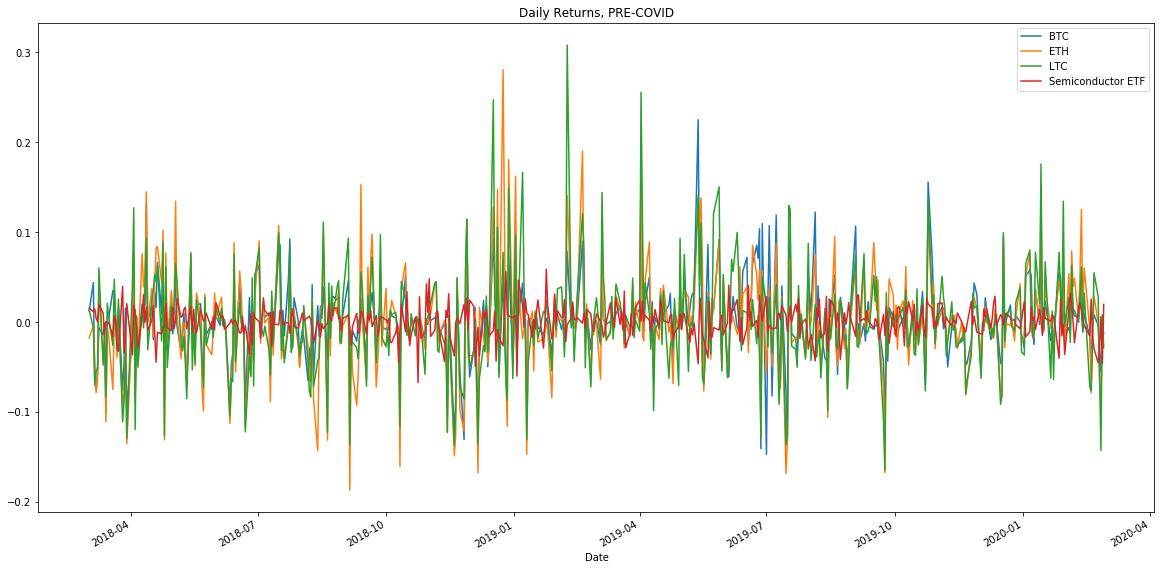

In [41]:
# Plot daily returns of all portfolios
#PRE-COVID
pre_daily_returns = pre_covid_combined_df.pct_change()
pre_daily_returns.head()
pre_daily_returns.plot(figsize=(20,10),title='Daily Returns, PRE-COVID')

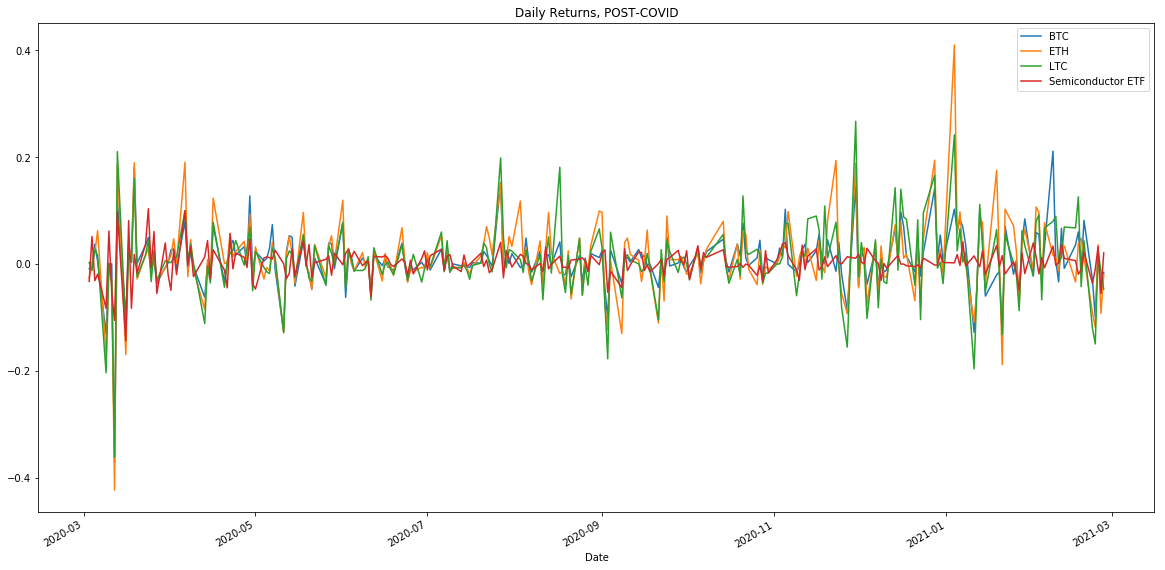

In [42]:
# Plot daily returns of all portfolios
#POST-COVID
post_daily_returns = post_covid_combined_df.pct_change()
post_daily_returns.head()
post_daily_returns.plot(figsize=(20,10),title='Daily Returns, POST-COVID')

In [43]:
#PRE-COVID
pre_daily_returns.hvplot(height=600, width =900,title='Pre-Covid Daily Returns, Combined')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [44]:
#POST-COVID
post_daily_returns.hvplot(height=600, width =900,title='Post-Covid Daily Returns, Combined')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [45]:
# Calculate cumulative returns of all portfolios
 # Use the `cumprod` function to calculate cumulative returns
pre_cumulative_returns = (1 + pre_daily_returns).cumprod() - 1
# Display sample values
pre_cumulative_returns.head()

BTC       ETH       LTC  Semiconductor ETF
Date                                                       
2018-03-01       NaN       NaN       NaN                NaN
2018-03-02  0.012364 -0.017596  0.013378           0.015643
2018-03-05  0.056826 -0.021229  0.006794           0.027375
2018-03-06 -0.015624 -0.063344 -0.062689           0.042446
2018-03-07 -0.089985 -0.136860 -0.113998           0.046929

In [46]:
# Calculate cumulative returns of all portfolios
 # Use the `cumprod` function to calculate cumulative returns
post_cumulative_returns = (1 + post_daily_returns).cumprod() - 1
# Display sample values
post_cumulative_returns.head()

BTC       ETH       LTC  Semiconductor ETF
Date                                                       
2020-03-02       NaN       NaN       NaN                NaN
2020-03-03 -0.009232 -0.026413  0.002442          -0.032811
2020-03-04 -0.012901 -0.026247 -0.010052           0.016772
2020-03-05  0.023574 -0.005645  0.017213          -0.015160
2020-03-06  0.028510  0.056189  0.033282          -0.034129

In [47]:
# Plot cumulative returns
pre_cumulative_returns.hvplot(figsize=(15,500),title='Pre-Covid Cumulative Returns, Combined')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [48]:
# Plot cumulative returns
post_cumulative_returns.hvplot(figsize=(15,500),title='Post-Covid Cumulative Returns, Combined')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [49]:
#data collected from the World Health Organization
#https://covid19.who.int/info/
    
csv_path = Path("../Resources/WHO-COVID-19-global-data.csv")
df_covid_cases = pd.read_csv(csv_path)
df_covid_cases.head()


Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [50]:
# Check for null values df_covid_cases
df_covid_cases.isnull().sum()

Date_reported          0
Country_code         638
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [51]:
 # Cleaning nulls from DataFrame by dropping
df_covid_cases = df_covid_cases.dropna().copy()
df_covid_cases.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [52]:
df_covid_cases = df_covid_cases.drop(columns=['Country_code'])
df_covid_cases.head()

Date_reported      Country WHO_region  New_cases  Cumulative_cases  \
0    2020-01-03  Afghanistan       EMRO          0                 0   
1    2020-01-04  Afghanistan       EMRO          0                 0   
2    2020-01-05  Afghanistan       EMRO          0                 0   
3    2020-01-06  Afghanistan       EMRO          0                 0   
4    2020-01-07  Afghanistan       EMRO          0                 0   

   New_deaths  Cumulative_deaths  
0           0                  0  
1           0                  0  
2           0                  0  
3           0                  0  
4           0                  0

In [53]:
#Change date column name 
df_covid_cases = df_covid_cases.rename(columns={"Date_reported": "Date"})
df_covid_cases.head()

Date      Country WHO_region  New_cases  Cumulative_cases  \
0  2020-01-03  Afghanistan       EMRO          0                 0   
1  2020-01-04  Afghanistan       EMRO          0                 0   
2  2020-01-05  Afghanistan       EMRO          0                 0   
3  2020-01-06  Afghanistan       EMRO          0                 0   
4  2020-01-07  Afghanistan       EMRO          0                 0   

   New_deaths  Cumulative_deaths  
0           0                  0  
1           0                  0  
2           0                  0  
3           0                  0  
4           0                  0

In [54]:
#sort by date 

df_covid_cases = df_covid_cases.sort_values(by=["Date"], ascending=True)
df_covid_cases.head()

Date      Country WHO_region  New_cases  Cumulative_cases  \
0       2020-01-03  Afghanistan       EMRO          0                 0   
17226   2020-01-03     Botswana       AFRO          0                 0   
65714   2020-01-03        Italy       EURO          0                 0   
65076   2020-01-03       Israel       EURO          0                 0   
112926  2020-01-03         Saba       AMRO          0                 0   

        New_deaths  Cumulative_deaths  
0                0                  0  
17226            0                  0  
65714            0                  0  
65076            0                  0  
112926           0                  0

In [55]:
#change index to date
df_covid_cases = df_covid_cases.set_index('Date')
df_covid_cases.head()

Country WHO_region  New_cases  Cumulative_cases  New_deaths  \
Date                                                                          
2020-01-03  Afghanistan       EMRO          0                 0           0   
2020-01-03     Botswana       AFRO          0                 0           0   
2020-01-03        Italy       EURO          0                 0           0   
2020-01-03       Israel       EURO          0                 0           0   
2020-01-03         Saba       AMRO          0                 0           0   

            Cumulative_deaths  
Date                           
2020-01-03                  0  
2020-01-03                  0  
2020-01-03                  0  
2020-01-03                  0  
2020-01-03                  0

In [56]:
# slice for only date and new covid cases 
df_covid_cases = df_covid_cases.drop(columns=['WHO_region','New_cases','New_deaths','Cumulative_deaths'])
df_covid_cases.head()

Country  Cumulative_cases
Date                                     
2020-01-03  Afghanistan                 0
2020-01-03     Botswana                 0
2020-01-03        Italy                 0
2020-01-03       Israel                 0
2020-01-03         Saba                 0

In [57]:
df_covid_cases.head()

Country  Cumulative_cases
Date                                     
2020-01-03  Afghanistan                 0
2020-01-03     Botswana                 0
2020-01-03        Italy                 0
2020-01-03       Israel                 0
2020-01-03         Saba                 0

In [58]:
#set dates to match cryptocurrency and semiconductor dates 
df_covid_cases = df_covid_cases[(df_covid_cases.index > '2020-03-01') & (df_covid_cases.index <= '2021-03-01')]
df_covid_cases.head()

Country  Cumulative_cases
Date                                      
2020-03-02        Mexico                 9
2020-03-02  Sierra Leone                 0
2020-03-02        Malawi                 0
2020-03-02        Latvia                 1
2020-03-02       Czechia                 3

In [59]:
# slice for only date and new covid cases 
#df_covid_cases = df_covid_cases.drop(columns=['Country'])
#df_covid_cases.tail()

#pseudo-code: i want everything grouped by country
df_covid_cumulative_cases = df_covid_cases.groupby([df_covid_cases.index]).sum()
df_covid_cumulative_cases
#sum up the cases 
 

Cumulative_cases
Date                        
2020-03-02             88914
2020-03-03             91233
2020-03-04             94192
2020-03-05             96599
2020-03-06            100206
...                      ...
2021-02-25         112231861
2021-02-26         112657259
2021-02-27         113068037
2021-02-28         113470544
2021-03-01         113832972

[365 rows x 1 columns]

In [60]:
df_covid_cumulative_cases.reset_index( inplace=True)
df_covid_cumulative_cases

Date  Cumulative_cases
0    2020-03-02             88914
1    2020-03-03             91233
2    2020-03-04             94192
3    2020-03-05             96599
4    2020-03-06            100206
..          ...               ...
360  2021-02-25         112231861
361  2021-02-26         112657259
362  2021-02-27         113068037
363  2021-02-28         113470544
364  2021-03-01         113832972

[365 rows x 2 columns]

In [61]:
#checking for duplicate index in covid data (false means no duplicates)
idx = pd.Index(df_covid_cumulative_cases.index)
pd.Series(idx.duplicated()).any()

False

In [62]:
post_covid_combined_df.head()

BTC         ETH        LTC  Semiconductor ETF
Date                                                             
2020-03-02  8869.669922  230.569778  60.995548         135.595596
2020-03-03  8787.786133  224.479630  61.144478         131.146591
2020-03-04  8755.246094  224.517975  60.382420         137.869766
2020-03-05  9078.762695  229.268188  62.045460         133.539932
2020-03-06  9122.545898  243.525299  63.025600         130.967850

In [63]:
#post_covid_combined_df['Cumulative_cases']=df_covid_cumulative_cases
#post_covid_combined_df
post_covid_combined_df.reset_index( inplace=True)
df_covid_cumulative_cases.reset_index( inplace=True)

In [64]:
frames = [post_covid_combined_df,df_covid_cumulative_cases]
result = pd.concat(frames, axis=1,join="outer")
result.head()

Date          BTC         ETH        LTC  Semiconductor ETF  index  \
0 2020-03-02  8869.669922  230.569778  60.995548         135.595596      0   
1 2020-03-03  8787.786133  224.479630  61.144478         131.146591      1   
2 2020-03-04  8755.246094  224.517975  60.382420         137.869766      2   
3 2020-03-05  9078.762695  229.268188  62.045460         133.539932      3   
4 2020-03-06  9122.545898  243.525299  63.025600         130.967850      4   

         Date  Cumulative_cases  
0  2020-03-02             88914  
1  2020-03-03             91233  
2  2020-03-04             94192  
3  2020-03-05             96599  
4  2020-03-06            100206

In [65]:
#set index to column 
#change index to date
#dresult= result.set_index('Date')
#dresult.head()

In [66]:
#dresult.isnull().sum()
#dresult = dresult.dropna()
#dresult

In [67]:
#dresult.isnull().sum()

In [68]:
#cases dresult.loc['Cumulative_cases']
#.plot(rot=45)
#df_covid_with_index = df_covid_cumulative_cases.reset_index()
df_covid_cumulative_cases.hvplot(xlabel="Mar 2020 to Mar 2021: 365 days", height=500, width=700,title='International Covid Cases from WHO')

:Curve   [index]   (Cumulative_cases)

In [71]:
#incline of covid cases 
df_covid_cumulative_cases.hvplot.area()

:Area   [index]   (Cumulative_cases)

In [79]:
 #currency Vs. 
post_covid_combined_df.hvplot.area()

:NdOverlay   [Variable]
   :Area   [index]   (value,Baseline)

In [76]:
post_covid_combined_df.hvplot.heatmap()

:HeatMap   [columns,index]   (value)

In [ ]:
#join WHO data with crypto and semiconductor data 
#post_WHO_combined_df = pd.concat([post_covid_combined_df, df_covid_cumulative_cases], axis="columns", join="inner")
 
# Sort datetime index in ascending order (past to present)
#post_WHO_combined_df.sort_index(inplace=True)

# Display a few rows
#post_WHO_combined_df.head()

In [ ]:
# Create Parallel Coordinates plot PRE-COVID
px.parallel_coordinates(dresult,)

In [ ]:
#take combined df of crypto. POST-COVID
#combined_precovid_date = combined_df.reset_index()
# Create scatter plot
#COLOR SHOULD BE COVID CASES
#px.scatter(combined_precovid_date, x="BTC", y="LTC", color="ETH")

In [ ]:
# Plot savings pie chart
#plot = combined_df.plot.bar( figsize=(5, 5))

In [ ]:
#COUNTRY ANALYSIS
#take the Taiwan, China covid cases and correlate to semiconductor prices. 
#slice out where country = 'Taiwan', 'China'
#Quote: covid slowing semiconductor output, "Companies are already dealing with a chip shortage that has slowed production"


In [ ]:
#CONCLUSION SECTION: 
#outcome: semiconductor ETF should go up- and scarcity goes up. Value goes up. Supply/Demand in the covid-19 era. 
#https://fortune.com/2021/06/08/taiwan-covid-outbreak-chip-shortage-factory-supply/